# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [78]:
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy import signal

import utils

In [79]:
# Config
IMAGE_1 = "tex_1.jpg"
IMAGE_2 = "malachai_1.jpg"

EYE_POINTS_BY_IMAGE = {
    "nutmeg.jpg": ((607, 290), (748, 370)),
    "DerekPicture.jpg": ((299,343), (439,331)),
    "malachai_1.jpg": ((1337, 1680), (1653, 1680)),
    "hawk_1.jpg": ((1284, 1743), (1596, 2040)),
    "tex_1.jpg": ((1356, 1482), (1584, 1491)),
}

In [80]:
# modify to where you store your project data including utils.py
datadir = Path.cwd() / "pictures"

img1_file = datadir / IMAGE_1
img2_file = datadir / IMAGE_2

img1 = np.float32(cv2.imread(img1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
img2 = np.float32(cv2.imread(img2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

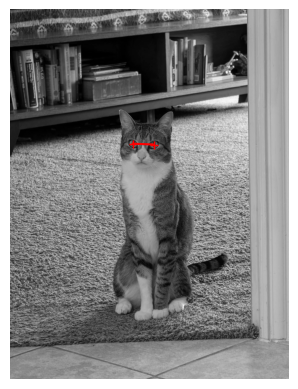

In [81]:
pts_im1 = utils.prompt_eye_selection(img1)
pts_im1 = np.array(EYE_POINTS_BY_IMAGE[IMAGE_1]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

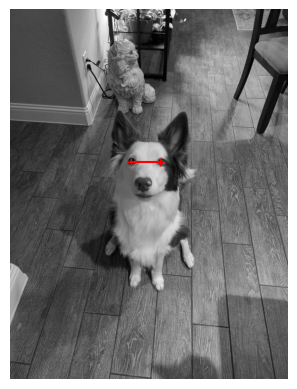

In [82]:
pts_im2 = utils.prompt_eye_selection(img2)
pts_im2 = np.array(EYE_POINTS_BY_IMAGE[IMAGE_2]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [83]:
# Align images using updated alignment function
img1, img2 = utils.align_images(
    img1_file, img2_file, pts_im1, pts_im2, save_images=False
)

In [84]:
# convert to grayscale
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) / 255.0
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) / 255.0

(Text(0.5, 1.0, 'Image 2'), [], [])

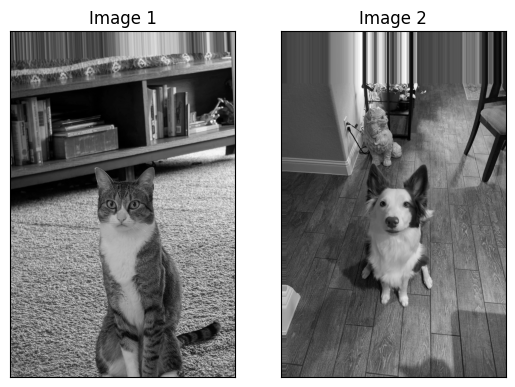

In [85]:
# Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(img1, cmap="gray")
axes[0].set_title("Image 1"), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(img2, cmap="gray")
axes[1].set_title("Image 2"), axes[1].set_xticks([]), axes[1].set_yticks([])

In [ ]:
def hybridImage(img1, img2, sigma_low, sigma_high):
    """
    Inputs:
        img1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        img2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter

    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    """
    # Per the lectures, kernel half-width is best set >= 3 * sigma, AND kernel must be odd in width
    # Ergo: K = 6 * sigma + 1
    K_low = 6 * sigma_low + 1
    K_high = 6 * sigma_high + 1

    # Compute the low-pass filter (Gaussian)
    low_pass_gaussian = cv2.getGaussianKernel(ksize=K_low, sigma=sigma_low)
    low_pass_filter = low_pass_gaussian @ low_pass_gaussian.T 

    # Compute the high-pass filter (Impulse - Gaussian)
    ## Impulse
    high_pass_impulse = np.zeros((K_high, K_high))
    high_pass_impulse[(K_high//2, K_high//2)] = 1

    ## Gaussian
    high_pass_gaussian = cv2.getGaussianKernel(ksize=K_high, sigma=sigma_high)
    high_pass_gaussian = high_pass_gaussian @ high_pass_gaussian.T

    ## Combined Kernel
    high_pass_filter = high_pass_impulse - high_pass_gaussian

    # Filter the images. ddepth=-1 matches the depth of the source image
    # BORDER_REFLECT to reduce shadows & other edge effects
    low_frequency_image = cv2.filter2D(
        src=img1,
        ddepth=-1,
        kernel=low_pass_filter,
        borderType=cv2.BORDER_REFLECT
    )
    high_frequency_image = cv2.filter2D(
        src=img2,
        ddepth=-1,
        kernel=high_pass_filter,
        borderType=cv2.BORDER_CONSTANT,
    )

    # Combine the images
    result = low_frequency_image + high_frequency_image

    return result, low_frequency_image, high_frequency_image


In [ ]:
sigma_low = 20  # choose parameters that work for your images
sigma_high = 25

im_hybrid, filtered1, filtered2 = hybridImage(img1, img2, sigma_low, sigma_high)
plt.imshow(filtered1, cmap="gray")
plt.imshow(filtered2, cmap="gray")

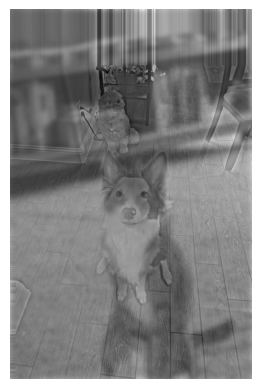

In [88]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

#### Color enhancement 

#### Color shift